<a href="https://colab.research.google.com/github/ev296/IntArt-y-RedNeu/blob/main/ACT_4_IA_Y_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EVELYN NÁÑEZ IBÁÑEZ 1961288 IMTC N1

A4: Entrenamiento de Red Neuronal Artificial simple.

In [14]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Normalización
mnist = keras.datasets.mnist

In [18]:
#Normalización
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

In [12]:

class_names = ['cero', 'uno', 'dos', 'tres' ,'cuatro' ,'cinco','seis','siete', 'ocho',  'nueve']
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
#Rango de la gama de color que llega hasta 255
train_images = train_images / 255.0

test_images = test_images / 255.0

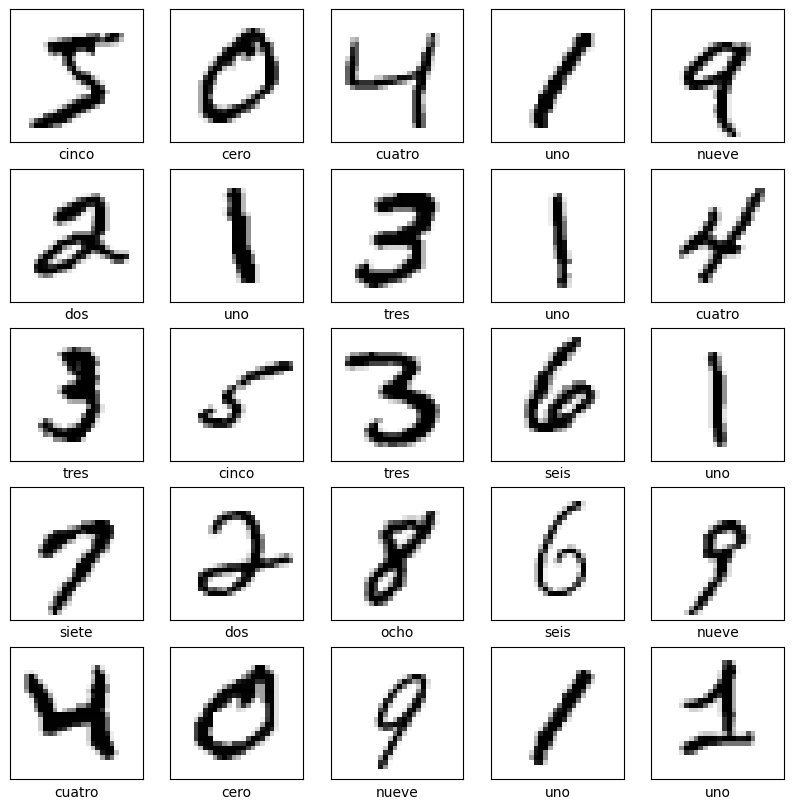

In [4]:
#Muestra de 25 números para que los relacione con su nombre
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
#Construir un modelo para poder configurar las capas 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [7]:
#Aqui ya se empieza a entrenar a la red
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2572 - accuracy: 0.9264
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1142 - accuracy: 0.9666
Epoch 3/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0788 - accuracy: 0.9763
Epoch 4/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9816
Epoch 5/12
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0454 - accuracy: 0.9862
Epoch 6/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0278 - accuracy: 0.9914
Epoch 8/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 9/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0184 - accuracy: 0.9945
Epoch 10/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [8]:
#Aqui podemos ver que tenemos una precision del 73% 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0903 - accuracy: 0.9777 - 617ms/epoch - 2ms/step

Test accuracy: 0.9776999950408936


In [9]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


7

In [10]:
#Se le dice a la red que haga una predicción para ver el entrenamiento previo en acción
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

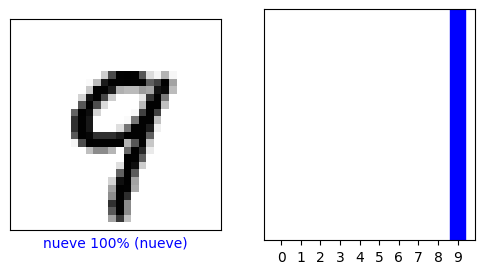

In [11]:
#Ejemplo 
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

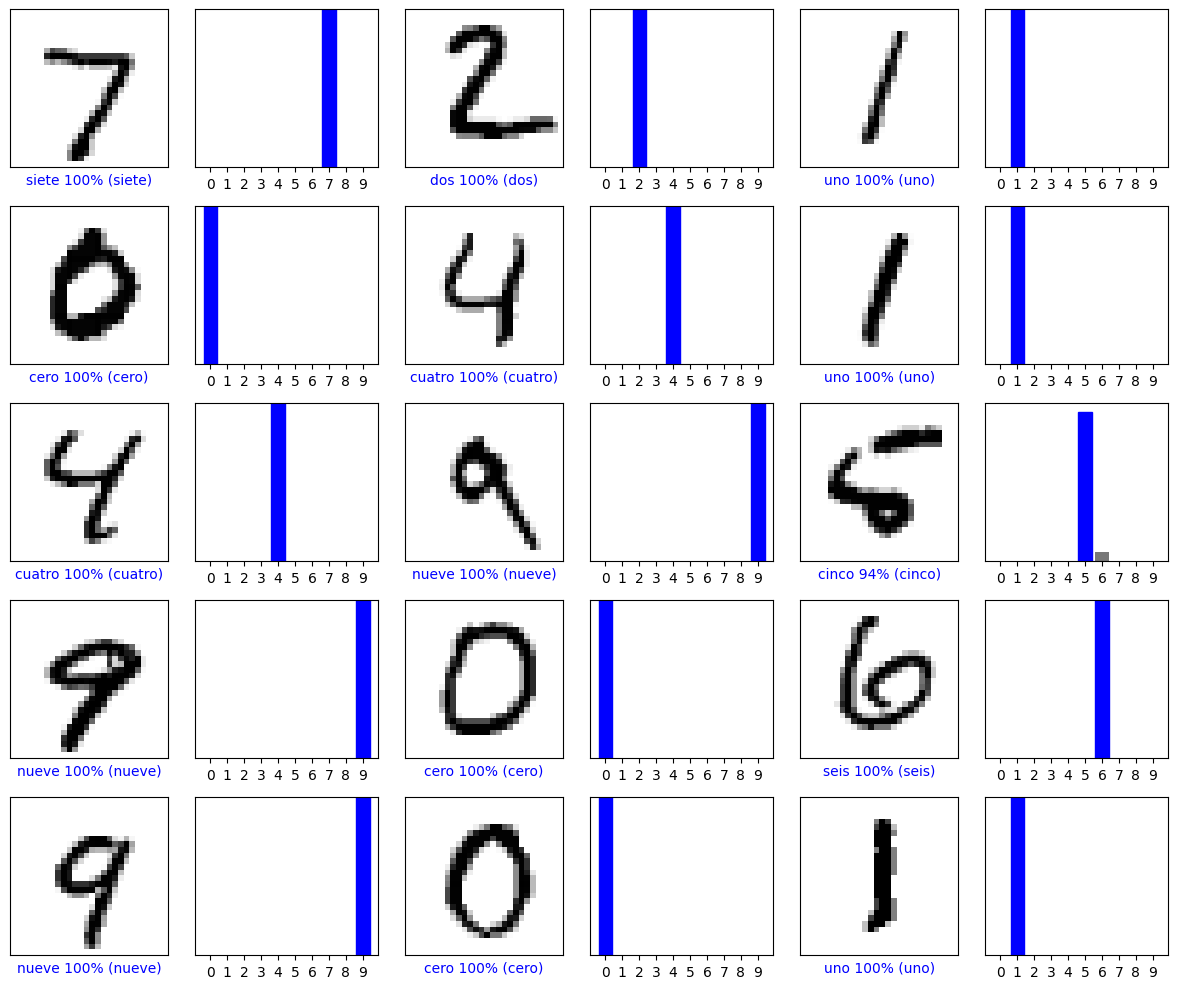

In [19]:
# Aquí se muestran algunas pruebas del aprendizaje de nuestra red, según el análisis que hicimos,
#debe tener una exactitud del 73%
# El color azul es la predicción correcta mientras que la de color rojo es la incorrecta
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [20]:
img=test_images[1]
print(img.shape)
     

(28, 28)


In [21]:
img=(np.expand_dims(img,0))
print(img.shape)
     

(1, 28, 28)


In [22]:
predictions_single=model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 113ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
